#### I.Problem Description 
#### Predict if the Merchant is Fraudster or not for an e-commerce client
#### ‘XYZ’ is a large e-commerce company with its operations in several countries. As the online giant grows, so has 
#### the number of fraudster merchants are. They deliver counterfeits or, in some cases, nothing at all. Such 
#### schemes leave customers duped, and place both legitimate merchants and the company itself in a constant 
#### battle to rid the marketplace of scammers. Determining this is also important in budgeting for fraud 
#### investigation. It's a well-known problem both to the company and to merchants, which they say hasn't 
#### effectively addressed the issue. They are serious about it and want to protect themselves from these fraudulent 
#### merchants using technology.
#### You are expected to create an analytical and modelling framework to predict the Merchant Fraudulency(yes/no)
#### based on the quantitative and qualitative features provided in the dataset while answering other questions too 
#### cited below.

In [207]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,recall_score,precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB 
%matplotlib inline

In [91]:
order= pd.read_csv("train_order_data-1561627847149.csv")
merc = pd.read_csv("train_merchant_data-1561627820784.csv")
Fr= pd.read_csv("train-1561627878332.csv")
ips = pd.read_csv("ip_boundaries_countries-1561628631121.csv")

In [8]:
order.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146


In [9]:
merc.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172


In [12]:
merc = merc.drop(["Ecommerce_Provider_ID"],axis=1)

In [15]:
merc

,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76
1,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169
2,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121
3,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186
4,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172
...,...,...,...,...,...,...
54208,222372,2018-05-01 21:58:19,KGVMENGCIAVOK,M,43,247.25.244.31
54209,73491,2018-06-11 19:54:13,QJGPOYDONTYCN,M,41,80.30.170.122
54210,176456,2018-01-06 20:05:55,ZOJNAJMGNRQPZ,F,36,188.39.154.217
54211,228277,2018-03-09 07:08:10,MQAOMNZFAHZLS,M,18,116.20.101.178


In [80]:
merco= merc.sort_values('Merchant_ID')
ordero= order.sort_values('Merchant_ID')

In [81]:
merco

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
18128,1746213,2,2018-01-11 03:47:13,STODAQAORGSWW,F,25,52.119.13.140
14616,1746213,4,2018-06-02 16:40:57,ZXSHVIBUYWOLA,F,38,166.13.141.186
36242,1746213,33,2018-08-10 08:30:49,IIDYBZOGBJIQQ,F,32,71.170.11.189
42407,1746213,41,2018-01-30 06:43:52,ZJQEGUIMFEAJE,F,28,98.86.110.205
2761,1746213,44,2018-03-11 13:44:43,LLZDZZVFWCUKS,F,33,245.89.131.248
...,...,...,...,...,...,...,...
13468,1746213,399965,2018-06-08 16:22:24,ZPKITRCOIEEJS,M,35,11.84.35.251
6623,1746213,399971,2018-07-22 00:49:24,LRNPVSYLPDBTP,F,26,226.126.25.209
13045,1746213,399987,2018-01-20 09:56:11,UMAZHOTAPDHTI,M,28,170.66.123.50
12442,1746213,399992,2018-06-04 17:43:28,PAISRQFPNJKTF,M,59,92.91.6.98


In [82]:
ordero

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID
5980,141033,328aca82a1ed,2018-02-23 10:03:37,135,SEO,Credit Card,2
31195,117580,a08573d3abed,2018-09-28 21:32:16,102,Direct,Debit Card,4
24455,138528,76fad3f4d254,2018-10-30 18:12:41,128,Direct,Credit Card,33
44967,136111,fa608bf56f15,2018-03-25 10:10:08,138,Ads,Internet Banking,41
32058,141646,8e767b8adde6,2018-06-28 05:45:06,82,Direct,Credit Card,44
...,...,...,...,...,...,...,...
15466,120278,14325d170e0f,2018-07-21 06:31:13,52,Ads,Internet Banking,399965
12561,138941,0c58c83c90ca,2018-08-17 10:22:06,95,SEO,Debit Card,399971
9980,131127,2fb8af4e158d,2018-04-28 09:55:20,75,Direct,Internet Banking,399987
5865,128893,49e932ffeff6,2018-10-02 07:19:17,205,Direct,Debit Card,399992


In [83]:
ordero.columns

Index(['Customer_ID', 'Order_ID', 'Date_of_Order', 'Order_Value_USD',
       'Order_Source', 'Order_Payment_Method', 'Merchant_ID'],
      dtype='object')

In [48]:
dfinal = merc.merge((order), on="Merchant_ID", how = 'inner')

In [ ]:
dfinal

In [165]:
ofinal= merco.merge(ordero, on="Merchant_ID", how = 'inner')

In [166]:
ofinal= ofinal.merge(Fr, on = "Merchant_ID", how = 'inner')

In [167]:
ofinal

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
0,1746213,2,2018-01-11 03:47:13,STODAQAORGSWW,F,25,52.119.13.140,141033,328aca82a1ed,2018-02-23 10:03:37,135,SEO,Credit Card,0
1,1746213,4,2018-06-02 16:40:57,ZXSHVIBUYWOLA,F,38,166.13.141.186,117580,a08573d3abed,2018-09-28 21:32:16,102,Direct,Debit Card,0
2,1746213,33,2018-08-10 08:30:49,IIDYBZOGBJIQQ,F,32,71.170.11.189,138528,76fad3f4d254,2018-10-30 18:12:41,128,Direct,Credit Card,0
3,1746213,41,2018-01-30 06:43:52,ZJQEGUIMFEAJE,F,28,98.86.110.205,136111,fa608bf56f15,2018-03-25 10:10:08,138,Ads,Internet Banking,0
4,1746213,44,2018-03-11 13:44:43,LLZDZZVFWCUKS,F,33,245.89.131.248,141646,8e767b8adde6,2018-06-28 05:45:06,82,Direct,Credit Card,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54208,1746213,399965,2018-06-08 16:22:24,ZPKITRCOIEEJS,M,35,11.84.35.251,120278,14325d170e0f,2018-07-21 06:31:13,52,Ads,Internet Banking,0
54209,1746213,399971,2018-07-22 00:49:24,LRNPVSYLPDBTP,F,26,226.126.25.209,138941,0c58c83c90ca,2018-08-17 10:22:06,95,SEO,Debit Card,0
54210,1746213,399987,2018-01-20 09:56:11,UMAZHOTAPDHTI,M,28,170.66.123.50,131127,2fb8af4e158d,2018-04-28 09:55:20,75,Direct,Internet Banking,0
54211,1746213,399992,2018-06-04 17:43:28,PAISRQFPNJKTF,M,59,92.91.6.98,128893,49e932ffeff6,2018-10-02 07:19:17,205,Direct,Debit Card,0


In [168]:
ofinal = ofinal.drop(['Registered_Device_ID','Ecommerce_Provider_ID','Customer_ID','Order_ID','Date_of_Order','Merchant_Registration_Date'],axis=1)

In [169]:
ofinal.head()

,Merchant_ID,Gender,Age,IP_Address,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
0,2,F,25,52.119.13.140,135,SEO,Credit Card,0
1,4,F,38,166.13.141.186,102,Direct,Debit Card,0
2,33,F,32,71.170.11.189,128,Direct,Credit Card,0
3,41,F,28,98.86.110.205,138,Ads,Internet Banking,0
4,44,F,33,245.89.131.248,82,Direct,Credit Card,1


In [170]:
ofinal.describe()

,Merchant_ID,Age,Order_Value_USD,Fraudster
count,54213.000000,54213.000000,54213.000000,54213.00000
mean,200395.176212,33.122240,92.230240,0.09269
std,115398.486895,8.630091,45.673263,0.29000
min,2.000000,18.000000,22.000000,0.00000
25%,100997.000000,27.000000,55.000000,0.00000
50%,200574.000000,32.000000,88.000000,0.00000
75%,300407.000000,39.000000,122.000000,0.00000
max,399993.000000,72.000000,385.000000,1.00000


In [171]:
ofinal.dtypes

Merchant_ID              int64
Gender                  object
Age                      int64
IP_Address              object
Order_Value_USD          int64
Order_Source            object
Order_Payment_Method    object
Fraudster                int64
dtype: object

In [38]:
##### Gender Order_Source Order_Payment_Method are categorical variables hence converting


In [124]:
#!pip install maxminddb-geolite2
from geolite2 import geolite2
geo = geolite2.reader()
def getcon(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return 'Other'
    try:
        return x['country']['names']['en'] if x else 'Other'
    except KeyError:
        return 'Other'

In [115]:
import ipaddress
x= getcon('52.119.13.140')
x

'United States'

In [111]:
# def ipadds(ip):
#     for values in ips:
#         if ipaddress.ip_address(ip)>=ipaddress.ip_address(ips['lower_bound_ip_address']) & ipaddress.ip_address(ip)<=ipaddress.ip_address(ips['upper_bound_ip_address']):
#             return ips.at[values,'country']
#             break
        
    
ofi = ofinal
#ofi['IP_Address'] = ofi['IP_Address'].astype('|S')
#ofi['IP_Address']= ofi['IP_Address'].apply(ipadds)
#ips['lower_bound_ip_address']= ips['lower_bound_ip_address'].apply(ipadds)

In [172]:
ofinal['Country']= ofinal['IP_Address'].apply(getcon)

In [173]:
ofinal

,Merchant_ID,Gender,Age,IP_Address,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Country
0,2,F,25,52.119.13.140,135,SEO,Credit Card,0,United States
1,4,F,38,166.13.141.186,102,Direct,Debit Card,0,Switzerland
2,33,F,32,71.170.11.189,128,Direct,Credit Card,0,United States
3,41,F,28,98.86.110.205,138,Ads,Internet Banking,0,United States
4,44,F,33,245.89.131.248,82,Direct,Credit Card,1,Other
...,...,...,...,...,...,...,...,...,...
54208,399965,M,35,11.84.35.251,52,Ads,Internet Banking,0,United States
54209,399971,F,26,226.126.25.209,95,SEO,Debit Card,0,Other
54210,399987,M,28,170.66.123.50,75,Direct,Internet Banking,0,Brazil
54211,399992,M,59,92.91.6.98,205,Direct,Debit Card,0,France


In [174]:
ofinal = ofinal.drop(['IP_Address'],axis=1)
ofinal

,Merchant_ID,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,Country
0,2,F,25,135,SEO,Credit Card,0,United States
1,4,F,38,102,Direct,Debit Card,0,Switzerland
2,33,F,32,128,Direct,Credit Card,0,United States
3,41,F,28,138,Ads,Internet Banking,0,United States
4,44,F,33,82,Direct,Credit Card,1,Other
...,...,...,...,...,...,...,...,...
54208,399965,M,35,52,Ads,Internet Banking,0,United States
54209,399971,F,26,95,SEO,Debit Card,0,Other
54210,399987,M,28,75,Direct,Internet Banking,0,Brazil
54211,399992,M,59,205,Direct,Debit Card,0,France


In [182]:
ofc = ofinal
cat_attr=['Gender','Order_Source','Order_Payment_Method', 'Fraudster']
for col in cat_attr:
     ofc[col] = ofinal[col].astype('category')
ofc

,Merchant_ID,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
0,2,F,25,135,SEO,Credit Card,0
1,4,F,38,102,Direct,Debit Card,0
2,33,F,32,128,Direct,Credit Card,0
3,41,F,28,138,Ads,Internet Banking,0
4,44,F,33,82,Direct,Credit Card,1
...,...,...,...,...,...,...,...
54208,399965,M,35,52,Ads,Internet Banking,0
54209,399971,F,26,95,SEO,Debit Card,0
54210,399987,M,28,75,Direct,Internet Banking,0
54211,399992,M,59,205,Direct,Debit Card,0


In [177]:
ofc.dtypes

Merchant_ID                int64
Gender                  category
Age                        int64
Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Fraudster               category
Country                 category
dtype: object

In [148]:
import plotly.express as plt 

In [155]:
Age,Order_Value_USD

In [178]:
data = pd.get_dummies( ofc, prefix=cat_attr, prefix_sep="_", drop_first=True)
data.head()

,Merchant_ID,Age,Order_Value_USD,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,...,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Zambia
0,2,25,135,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4,38,102,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33,32,128,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,41,28,138,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,44,33,82,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
data.columns

Index(['Merchant_ID', 'Age', 'Order_Value_USD', 'Gender_M',
       'Order_Source_Direct', 'Order_Source_SEO',
       'Order_Payment_Method_Credit Card', 'Order_Payment_Method_Debit Card',
       'Order_Payment_Method_E-wallet',
       'Order_Payment_Method_Internet Banking', 'Fraudster_1'],
      dtype='object')

In [185]:
data = pd.get_dummies( ofc, prefix=cat_attr, prefix_sep="_", drop_first=True)
data

,Merchant_ID,Age,Order_Value_USD,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Fraudster_1
0,2,25,135,0,0,1,1,0,0,0,0
1,4,38,102,0,1,0,0,1,0,0,0
2,33,32,128,0,1,0,1,0,0,0,0
3,41,28,138,0,0,0,0,0,0,1,0
4,44,33,82,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
54208,399965,35,52,1,0,0,0,0,0,1,0
54209,399971,26,95,0,0,1,0,1,0,0,0
54210,399987,28,75,1,1,0,0,0,0,1,0
54211,399992,59,205,1,1,0,0,1,0,0,0


In [342]:
X = data.loc[:,data.columns.difference(['Fraudster_1','Merchant_ID','Order_Payment_Method_Internet Banking'])]
y = data.Fraudster_1

In [343]:
X

,Age,Gender_M,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Source_Direct,Order_Source_SEO,Order_Value_USD
0,25,0,1,0,0,0,1,135
1,38,0,0,1,0,1,0,102
2,32,0,1,0,0,1,0,128
3,28,0,0,0,0,0,0,138
4,33,0,1,0,0,1,0,82
...,...,...,...,...,...,...,...,...
54208,35,1,0,0,0,0,0,52
54209,26,0,0,1,0,0,1,95
54210,28,1,0,0,0,1,0,75
54211,59,1,0,1,0,1,0,205


In [344]:
y

0        0
1        0
2        0
3        0
4        1
        ..
54208    0
54209    0
54210    0
54211    0
54212    0
Name: Fraudster_1, Length: 54213, dtype: uint8

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size = 0.3, random_state=183)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37949, 8)
(16264, 8)
(37949,)
(16264,)


In [346]:
scaler = MinMaxScaler()                                     #standardize numerical variables
X_train[['Age','Order_Value_USD']] = scaler.fit_transform(X_train[['Age','Order_Value_USD']])
X_test[['Age','Order_Value_USD']]=scaler.transform(X_test[['Age','Order_Value_USD']])

In [347]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

#### Model Building

In [348]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 529.393148
         Iterations 6
                                 Results: Logit
Model:                   Logit                Pseudo R-squared:     inf          
Dependent Variable:      Fraudster_1          AIC:                  40179899.1132
Date:                    2023-02-12 14:39     BIC:                  40179976.0092
No. Observations:        37949                Log-Likelihood:       -2.0090e+07  
Df Model:                8                    LL-Null:              0.0000       
Df Residuals:            37940                LLR p-value:          1.0000       
Converged:               1.0000               Scale:                1.0000       
No. Iterations:          6.0000                                                  
---------------------------------------------------------------------------------
                                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------

C:\Users\samje\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\samje\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\samje\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3511: RuntimeWarning:

divide by zero encountered in double_scalars



In [349]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train,y_train)

LogisticRegression()

In [350]:
train_preds = logistic_model.predict(X_train)
train_preds_prob=logistic_model.predict_proba(X_train)[:,1]
test_preds = logistic_model.predict(X_test)
test_preds_prob=logistic_model.predict_proba(X_test)[:,1]

In [351]:
train_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [352]:
confusion_matrix(y_train,train_preds)

array([[34432,     0],
       [ 3517,     0]], dtype=int64)

In [353]:
train_accuracy_1= accuracy_score(y_train,train_preds)
train_recall_1= recall_score(y_train,train_preds)
train_precision_1= precision_score(y_train,train_preds)

test_accuracy_1= accuracy_score(y_test,test_preds)
test_recall_1= recall_score(y_test,test_preds)
test_precision_1= precision_score(y_test,test_preds)

C:\Users\samje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\samje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [354]:
print(train_accuracy_1)
print(train_recall_1)
print(train_precision_1)

print(test_accuracy_1)
print(test_recall_1)
print(test_precision_1)

0.907322986112941
0.0
0.0
0.9072798819478604
0.0
0.0


In [355]:
print(classification_report(y_train,train_preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     34432
           1       0.00      0.00      0.00      3517

    accuracy                           0.91     37949
   macro avg       0.45      0.50      0.48     37949
weighted avg       0.82      0.91      0.86     37949



C:\Users\samje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\samje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\samje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [356]:
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     14756
           1       0.00      0.00      0.00      1508

    accuracy                           0.91     16264
   macro avg       0.45      0.50      0.48     16264
weighted avg       0.82      0.91      0.86     16264



C:\Users\samje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\samje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\samje\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [357]:
fpr, tpr, threshold = roc_curve(y_train, train_preds_prob)
roc_auc = auc(fpr, tpr)

<IPython.core.display.Javascript object>


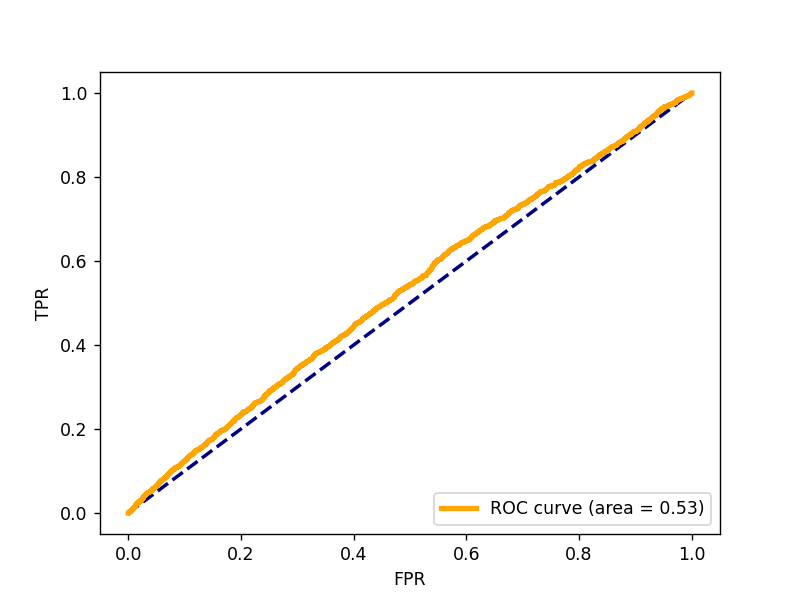

In [358]:
%matplotlib notebook
# plt.figure()
plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
plt.plot(fpr,tpr,color='orange', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")

In [359]:
# import seaborn as sns
# sns.heatmap(data.corr(),annot=True,cmap='Purples')

#### Manual inspection of threshold value

In [360]:
roc_df = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':threshold})

roc_df

,FPR,TPR,Threshold
0,0.000000,0.000000,1.125353
1,0.000000,0.000284,0.125353
2,0.000261,0.000284,0.122229
3,0.000319,0.000284,0.122044
4,0.000900,0.000284,0.120121
...,...,...,...
13824,0.999303,1.000000,0.071198
13825,0.999361,1.000000,0.071146
13826,0.999419,1.000000,0.071134
13827,0.999477,1.000000,0.071133


In [361]:
roc_df.sort_values('TPR',ascending=False,inplace=True)


In [362]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

In [363]:
optimal_threshold

0.09048936710226169

In [364]:
custom_threshold = 0.09


## To get in 0-1 format vector (pandas Series)
final_pred_array = pd.Series([0 if x>custom_threshold else 1 for x in train_preds_prob])
final_pred_array.value_counts()

final_test_pred_array = pd.Series([0 if x>custom_threshold else 1 for x in test_preds_prob])
final_test_pred_array.value_counts()

0    9587
1    6677
dtype: int64

In [365]:
## To get True-False format vector (pandas Series)
final_pred = pd.Series(train_preds_prob > 0.099)
final_pred.value_counts()
final_test_pred=pd.Series(test_preds_prob > 0.099)

In [366]:
print(classification_report(y_train,final_pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83     34432
           1       0.10      0.28      0.15      3517

    accuracy                           0.71     37949
   macro avg       0.51      0.52      0.49     37949
weighted avg       0.84      0.71      0.76     37949



In [367]:
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83     14756
           1       0.11      0.28      0.15      1508

    accuracy                           0.72     16264
   macro avg       0.51      0.52      0.49     16264
weighted avg       0.84      0.72      0.77     16264



In [368]:
train_accuracy= accuracy_score(y_train,final_pred)
train_recall= recall_score(y_train,final_pred)
print(train_accuracy)
print(train_recall)

test_accuracy= accuracy_score(y_test,final_test_pred)
test_recall= recall_score(y_test,final_test_pred)
print(test_accuracy)
print(test_recall)

0.7131676724024348
0.2783622405459198
0.7150147565174618
0.2791777188328912
